In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only = False)

In [50]:
from scipy.stats import shapiro
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
df = pd.read_excel('Election_Data.xlsx',sheet_name = 'Election_Dataset_Two Classes')

In [54]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [55]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [56]:
df.shape

(1525, 10)

In [57]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [59]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [62]:
df.rename(columns = {'economic.cond.national':'economic_cond_national','economic.cond.household':'economic_cond_household',
                    'political.knowledge':'political_knowledge'}, inplace = True)

In [63]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [64]:
df.shape

(1525, 9)

In [65]:
df.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [66]:
df.describe(include = 'O')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [67]:
df.skew()

age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

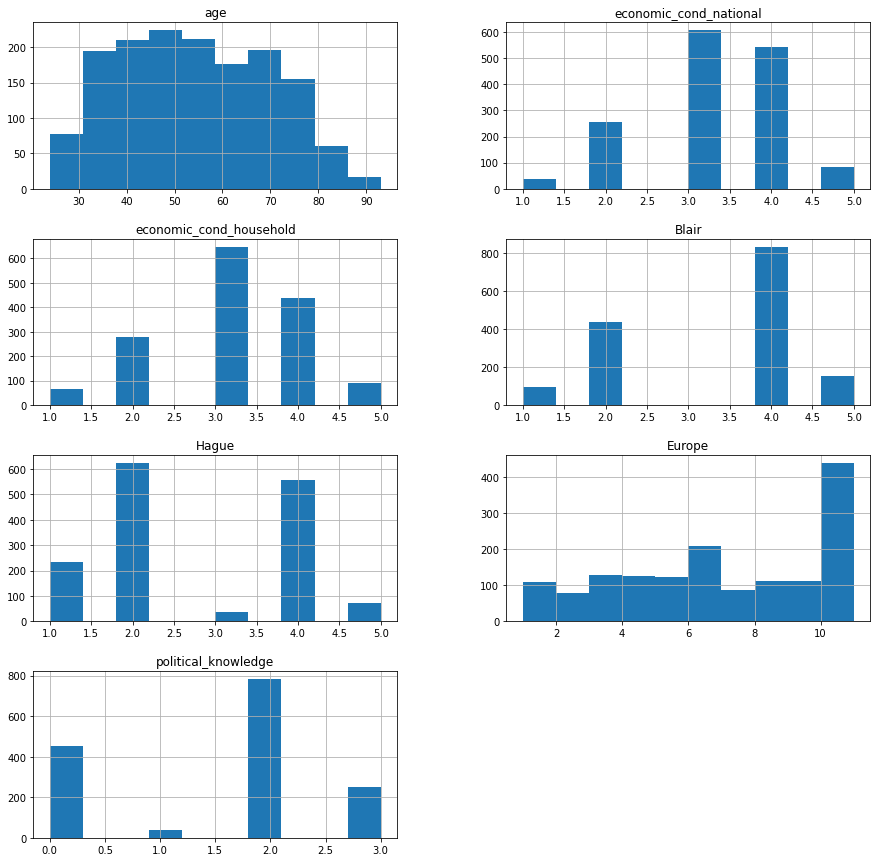

In [68]:
df.hist(figsize=(15,15),layout=(4,2));

In [69]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [70]:
for i in num:
    print(shapiro(df[i]))

ShapiroResult(statistic=0.9756978750228882, pvalue=2.2188419806064502e-15)
ShapiroResult(statistic=0.8851473331451416, pvalue=3.4201316704441546e-32)
ShapiroResult(statistic=0.8982595205307007, pvalue=1.2109346591436469e-30)
ShapiroResult(statistic=0.7875010371208191, pvalue=1.126251601747142e-40)
ShapiroResult(statistic=0.8276805281639099, pvalue=1.1412562572876235e-37)
ShapiroResult(statistic=0.914910614490509, pvalue=1.9664964086589718e-28)
ShapiroResult(statistic=0.7745608687400818, pvalue=1.5209693531781564e-41)


In [71]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

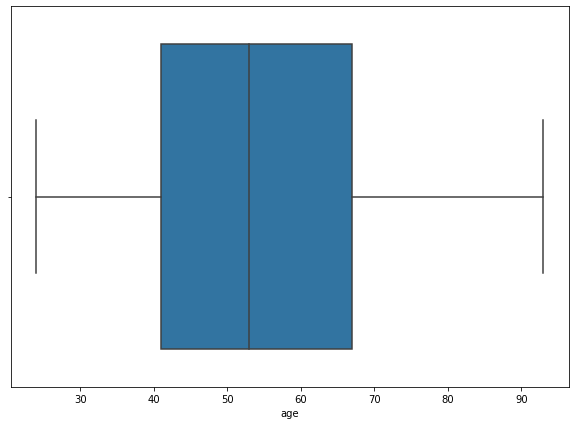

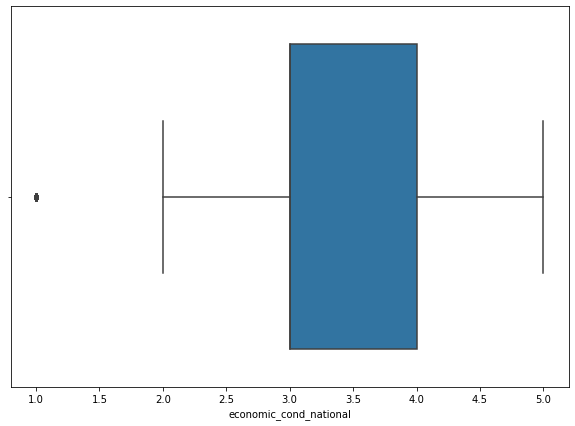

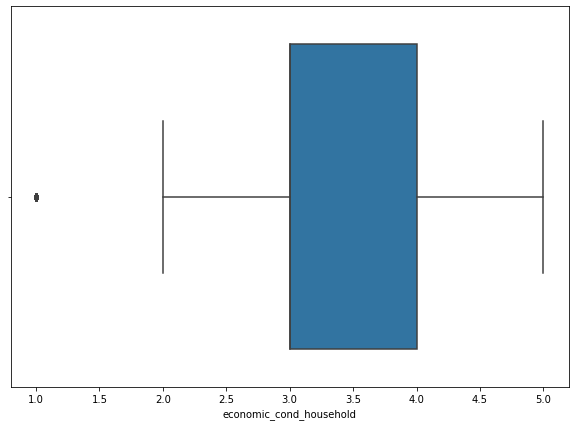

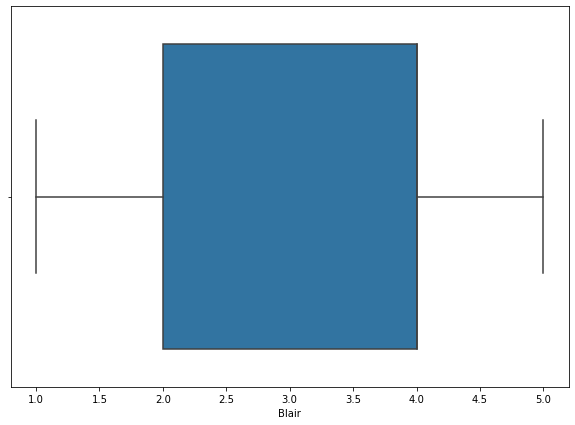

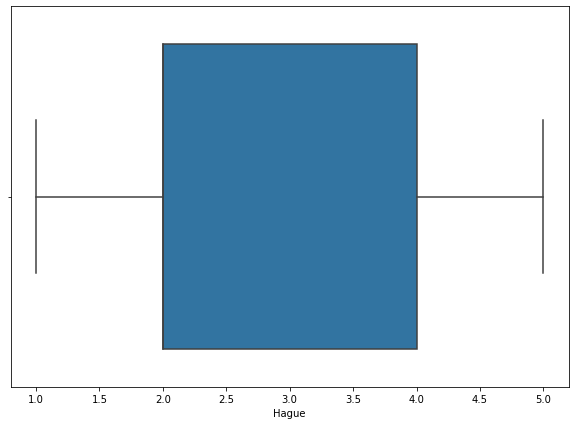

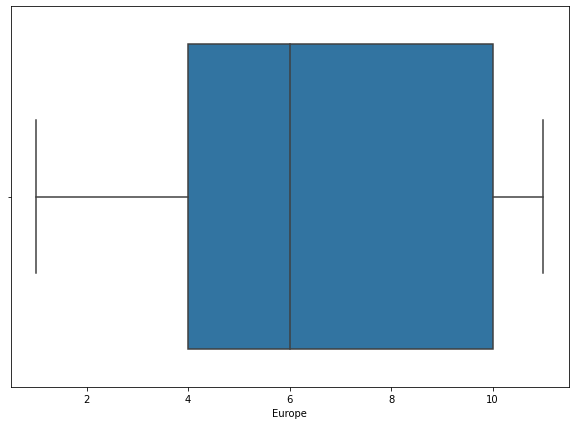

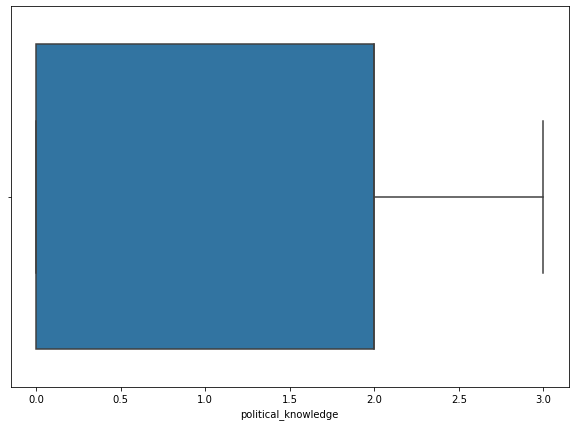

In [72]:
for i in df_num.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df, x = df_num[i])
    plt.show()

In [73]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [74]:
outliers = find_outliers_IQR(df[['economic_cond_national','economic_cond_household']])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 1525
max outlier value: economic_cond_national     1.0
economic_cond_household    1.0
dtype: float64
min outlier value: economic_cond_national     1.0
economic_cond_household    1.0
dtype: float64


In [75]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [76]:
for column in df_num.columns:
    lr,ur=remove_outlier(df_num[column])
    df_num[column]=np.where(df_num[column]>ur,ur,df_num[column])
    df_num[column]=np.where(df_num[column]<lr,lr,df_num[column])

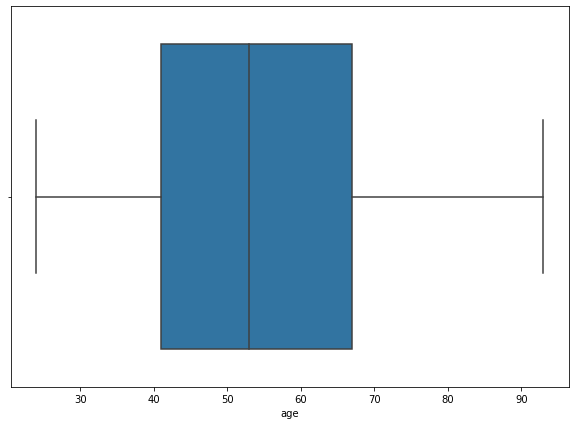

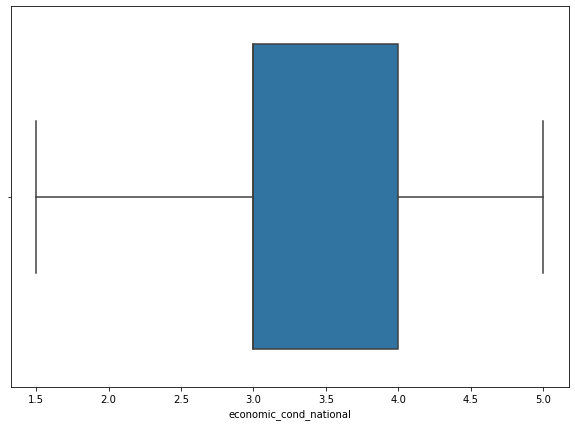

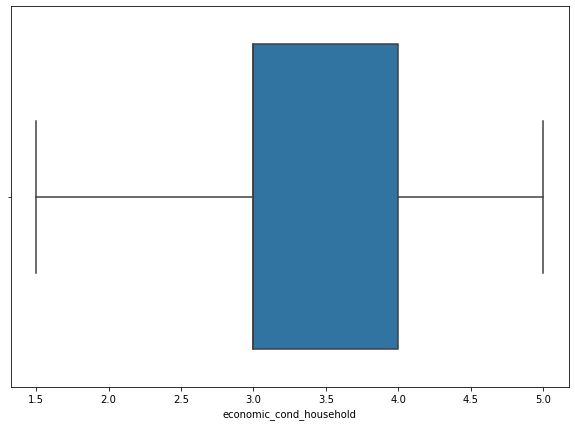

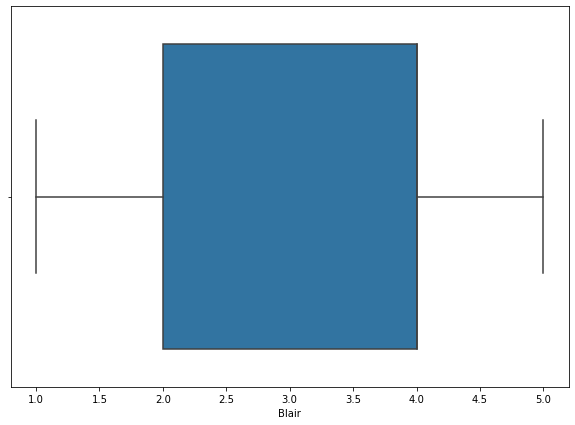

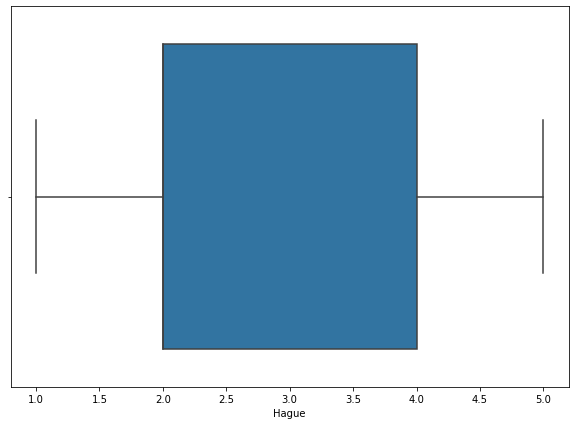

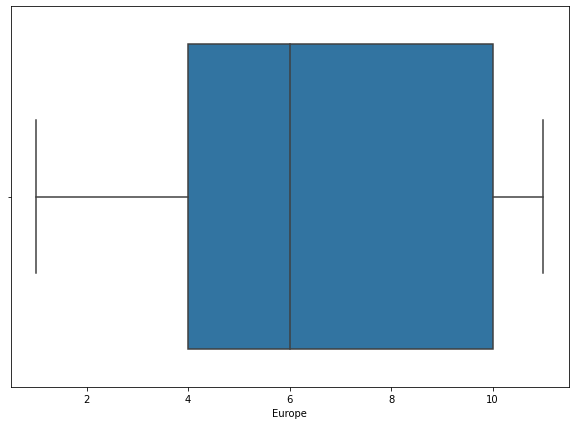

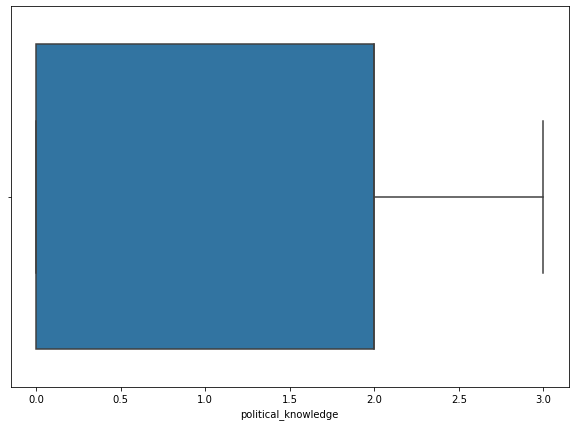

In [77]:
for i in df_num.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df, x = df_num[i])
    plt.show()

In [78]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(df[column]);
    plt.show()

Description of age
----------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 


Distribution of age
----------------------------------------------------------------------------


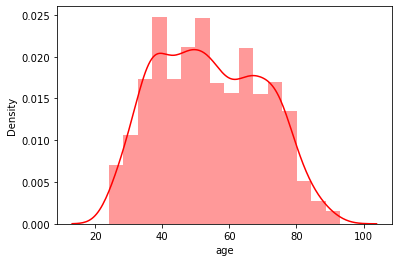

Boxplot of age
----------------------------------------------------------------------------


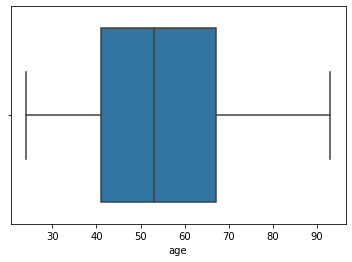

Description of economic_cond_national
----------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_national, dtype: float64 


Distribution of economic_cond_national
----------------------------------------------------------------------------


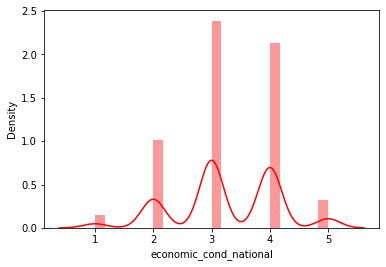

Boxplot of economic_cond_national
----------------------------------------------------------------------------


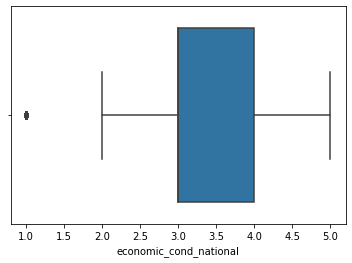

Description of economic_cond_household
----------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_household, dtype: float64 


Distribution of economic_cond_household
----------------------------------------------------------------------------


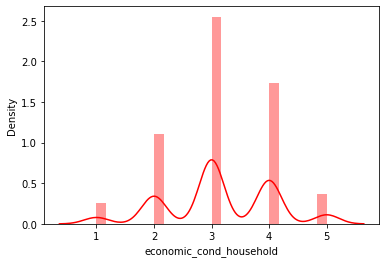

Boxplot of economic_cond_household
----------------------------------------------------------------------------


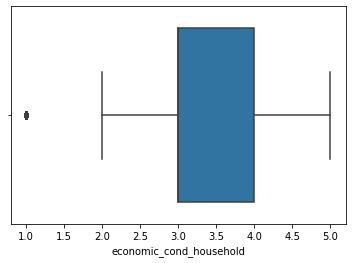

Description of Blair
----------------------------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 


Distribution of Blair
----------------------------------------------------------------------------


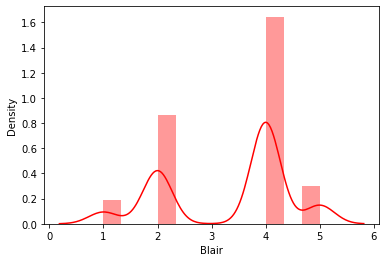

Boxplot of Blair
----------------------------------------------------------------------------


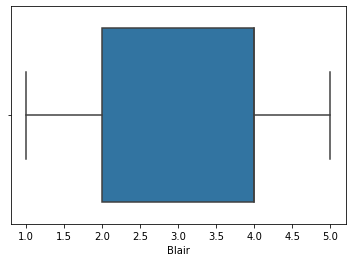

Description of Hague
----------------------------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 


Distribution of Hague
----------------------------------------------------------------------------


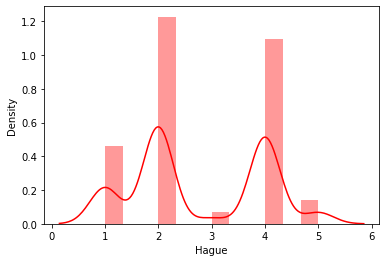

Boxplot of Hague
----------------------------------------------------------------------------


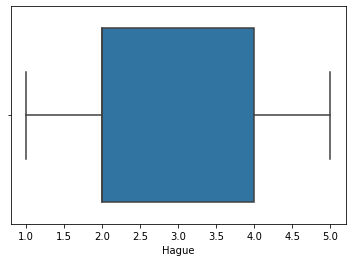

Description of Europe
----------------------------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 


Distribution of Europe
----------------------------------------------------------------------------


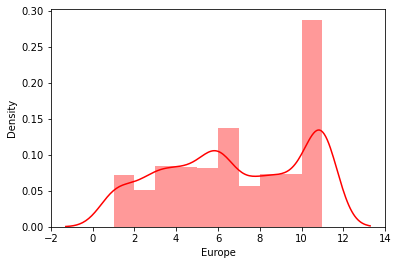

Boxplot of Europe
----------------------------------------------------------------------------


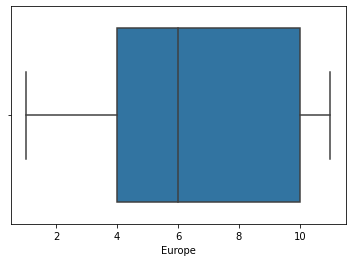

Description of political_knowledge
----------------------------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political_knowledge, dtype: float64 


Distribution of political_knowledge
----------------------------------------------------------------------------


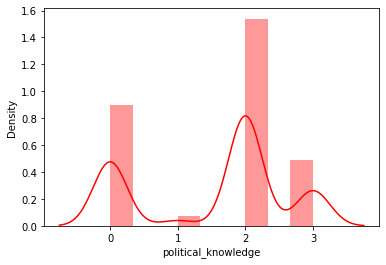

Boxplot of political_knowledge
----------------------------------------------------------------------------


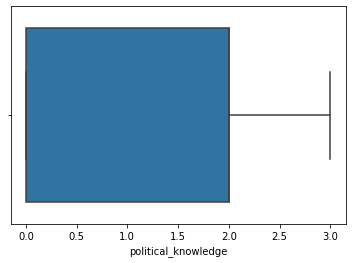

In [79]:
for i in df_num:
    univariateAnalysis_numeric(i,9)

In [80]:
def univariateAnalysis_categorical(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(include='O'),end=' ')
    print('')
    print('')
    
    plt.figure()
    print("Bargraph of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(y=df[column]);
    plt.show()

Description of vote
----------------------------------------------------------------------------
count       1525
unique         2
top       Labour
freq        1063
Name: vote, dtype: object 

Bargraph of vote
----------------------------------------------------------------------------


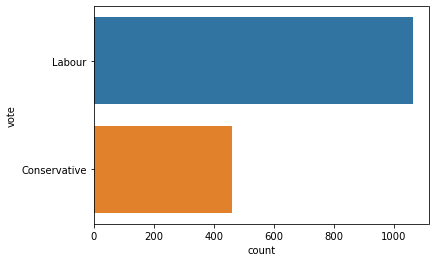

Description of gender
----------------------------------------------------------------------------
count       1525
unique         2
top       female
freq         812
Name: gender, dtype: object 

Bargraph of gender
----------------------------------------------------------------------------


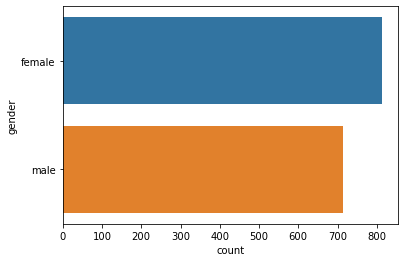

In [81]:
for i in df_cat:
    univariateAnalysis_categorical(i,7)

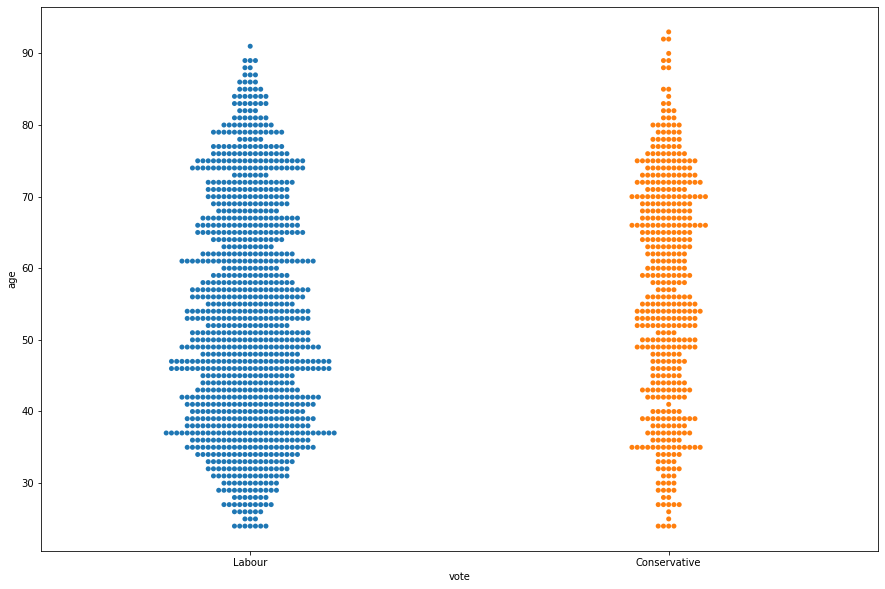

In [82]:
plt.figure(figsize = (15,10))
sns.swarmplot(data = df, x = 'vote', y = 'age');

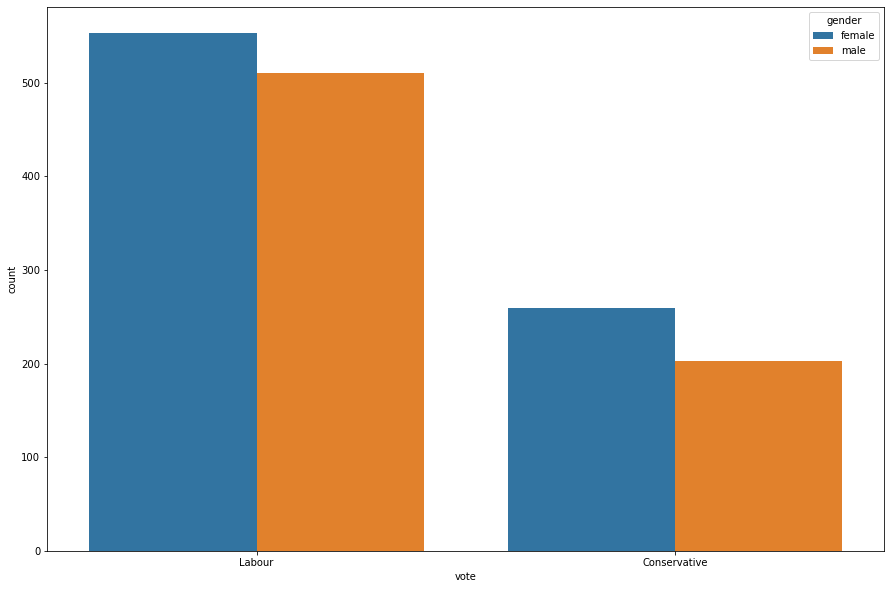

In [83]:
plt.figure(figsize = (15,10))
sns.countplot(data = df, x = 'vote', hue = 'gender');

In [84]:
pd.crosstab(df['economic_cond_national'],df['Blair'])

Blair,1,2,3,4,5
economic_cond_national,,,,,
1,10,18,0,8,1
2,38,103,0,111,5
3,32,203,0,326,46
4,17,100,1,351,73
5,0,14,0,40,28


In [85]:
pd.crosstab(df['economic_cond_household'],df['Blair'])

Blair,1,2,3,4,5
economic_cond_household,,,,,
1,10,23,0,31,1
2,30,107,0,129,14
3,34,201,1,351,61
4,17,95,0,275,53
5,6,12,0,50,24


In [86]:
pd.crosstab(df['political_knowledge'],df['Blair'])

Blair,1,2,3,4,5
political_knowledge,,,,,
0,19,135,0,252,49
1,2,12,0,23,1
2,57,226,0,423,76
3,19,65,1,138,27


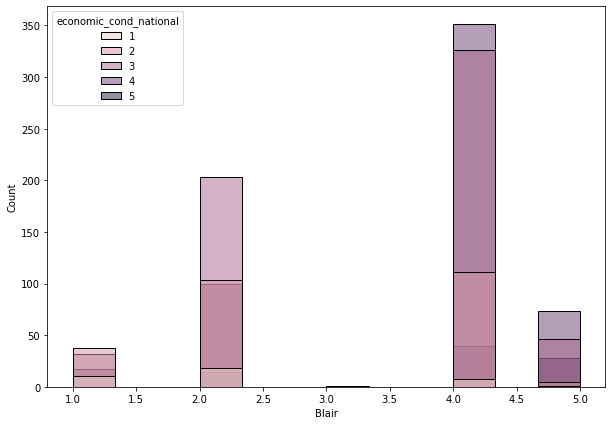

In [87]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Blair', hue = 'economic_cond_national');

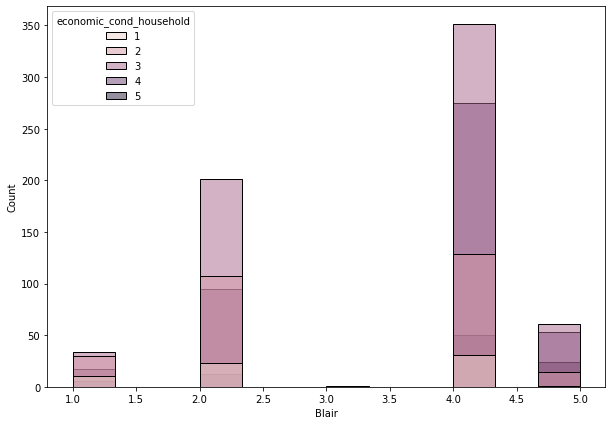

In [88]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Blair', hue = 'economic_cond_household');

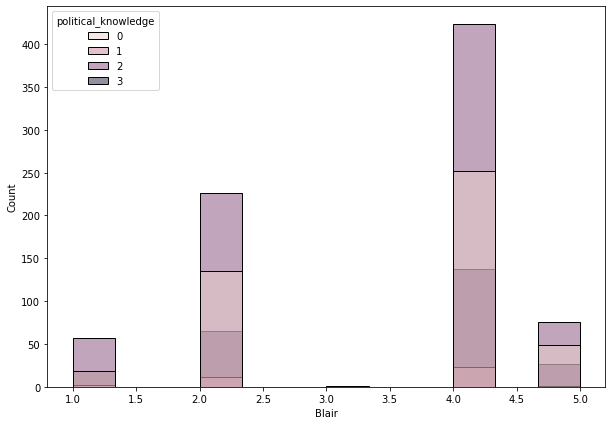

In [89]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Blair', hue = 'political_knowledge');

In [90]:
pd.crosstab(df['economic_cond_national'],df['Hague'])

Hague,1,2,3,4,5
economic_cond_national,,,,,
1,2,8,1,23,3
2,22,84,7,126,18
3,91,240,18,230,28
4,96,254,10,163,19
5,22,38,1,16,5


In [91]:
pd.crosstab(df['economic_cond_household'],df['Hague'])

Hague,1,2,3,4,5
economic_cond_household,,,,,
1,7,22,1,31,4
2,31,104,8,117,20
3,105,252,22,240,29
4,72,215,5,134,14
5,18,31,1,36,6


In [92]:
pd.crosstab(df['political_knowledge'],df['Hague'])

Hague,1,2,3,4,5
political_knowledge,,,,,
0,66,186,13,173,17
1,5,14,5,11,3
2,103,327,13,299,40
3,59,97,6,75,13


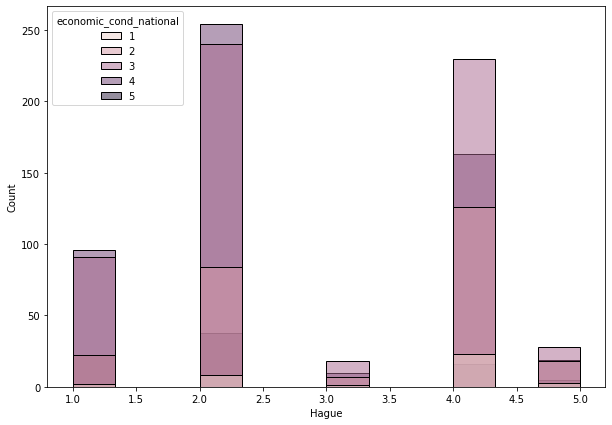

In [93]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Hague', hue = 'economic_cond_national');

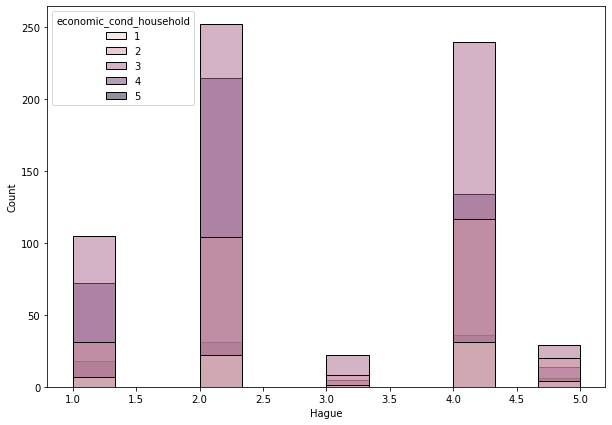

In [94]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Hague', hue = 'economic_cond_household');

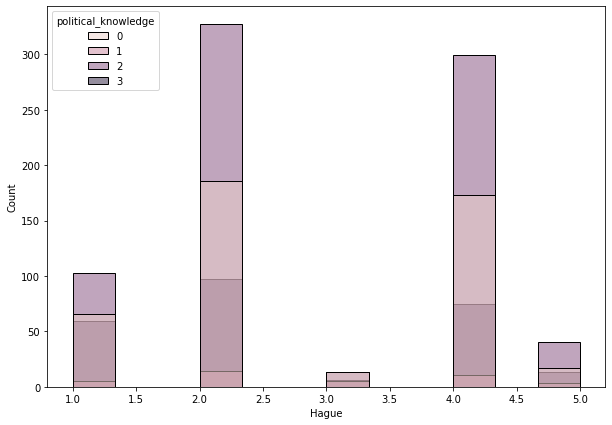

In [95]:
plt.figure(figsize = (10,7))
sns.histplot(data = df , x = 'Hague', hue = 'political_knowledge');

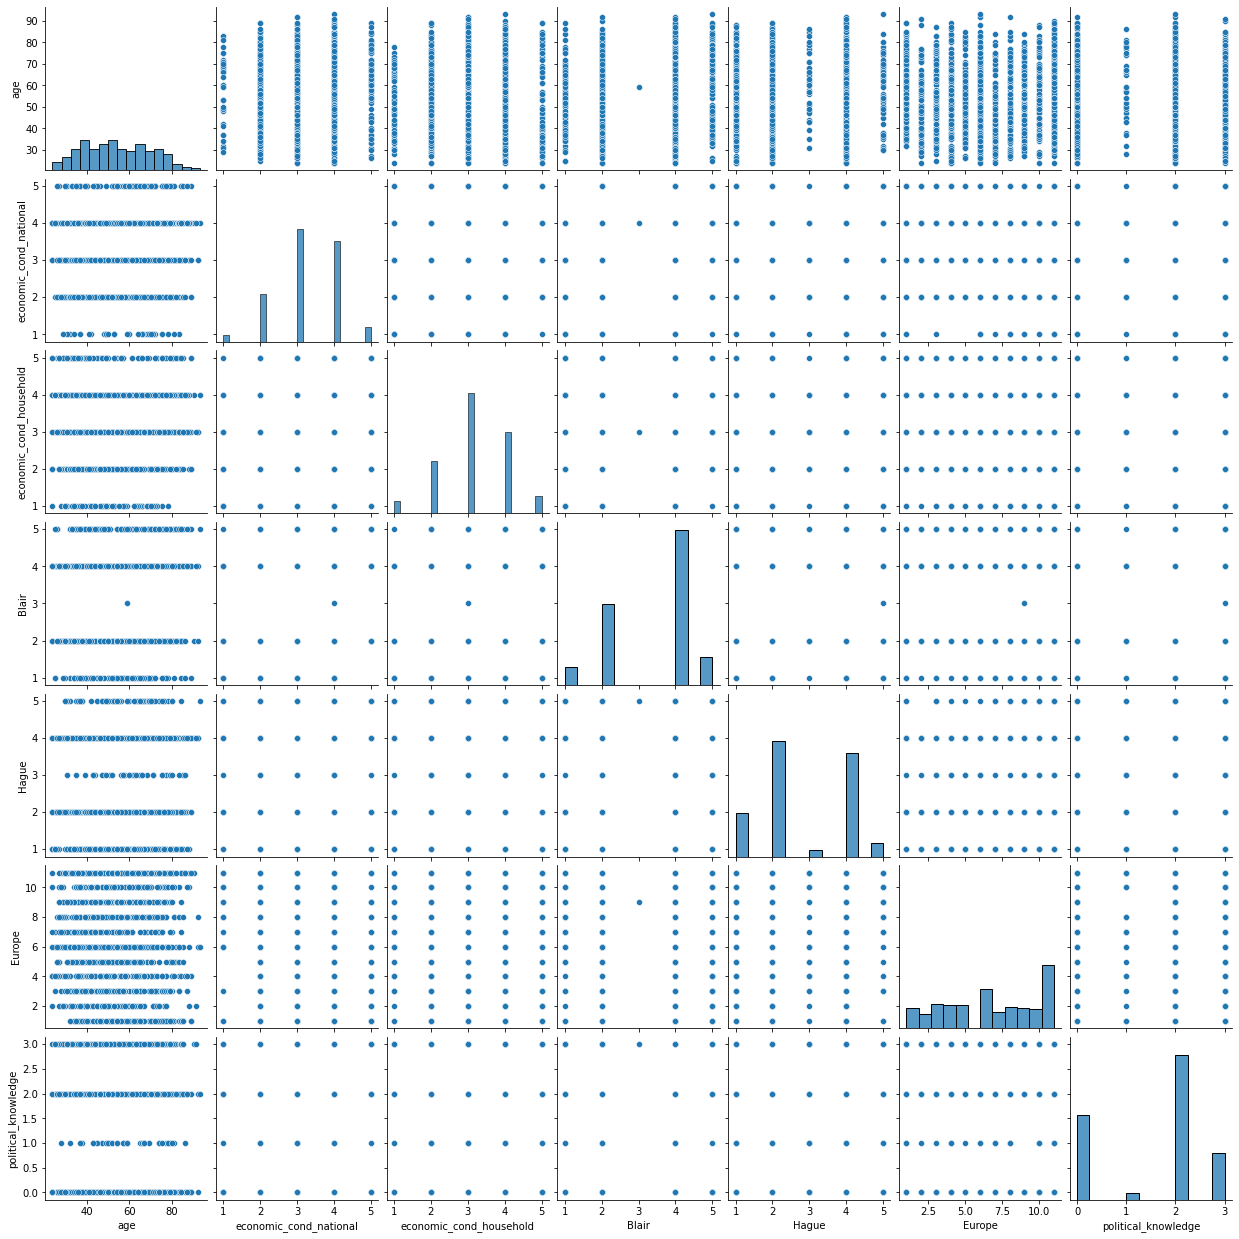

In [96]:
sns.pairplot(data = df);

In [97]:
df.corr()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic_cond_national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic_cond_household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political_knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


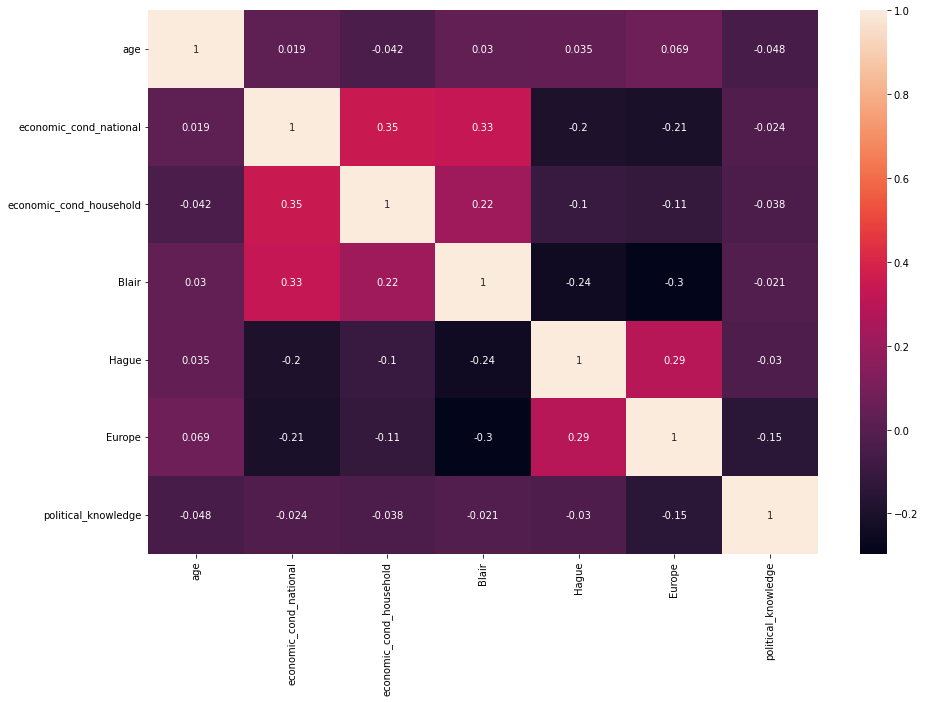

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

In [99]:
category = pd.cut(df.age,
                  bins=[0,20,40,60,80,100],
                  labels=[1,2,3,4,5])
df.insert(6,'age_group',category)
df['age_group'].value_counts()

3    596
4    500
2    367
5     62
1      0
Name: age_group, dtype: int64

In [100]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,age_group,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,3,2,2,female
1,Labour,36,4,4,4,4,2,5,2,male
2,Labour,35,4,4,5,2,2,3,2,male
3,Labour,24,4,2,2,1,2,4,0,female
4,Labour,41,2,2,1,1,3,6,2,male


In [101]:
df = pd.get_dummies(df, columns = {'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'age_group',
                                   'Europe', 'political_knowledge'})
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)

In [102]:
df.drop('age', axis = 1, inplace = True)

In [103]:
df['vote'] = pd.Categorical(df['vote']).codes
df.head()

,vote,Hague_1,Hague_2,Hague_3,Hague_4,Hague_5,economic_cond_national_1,economic_cond_national_2,economic_cond_national_3,economic_cond_national_4,...,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5,political_knowledge_0,political_knowledge_1,political_knowledge_2,political_knowledge_3,gender_male
0,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
3,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [104]:
df.vote.value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   vote                       1525 non-null   int8 
 1   Hague_1                    1525 non-null   uint8
 2   Hague_2                    1525 non-null   uint8
 3   Hague_3                    1525 non-null   uint8
 4   Hague_4                    1525 non-null   uint8
 5   Hague_5                    1525 non-null   uint8
 6   economic_cond_national_1   1525 non-null   uint8
 7   economic_cond_national_2   1525 non-null   uint8
 8   economic_cond_national_3   1525 non-null   uint8
 9   economic_cond_national_4   1525 non-null   uint8
 10  economic_cond_national_5   1525 non-null   uint8
 11  Blair_1                    1525 non-null   uint8
 12  Blair_2                    1525 non-null   uint8
 13  Blair_3                    1525 non-null   uint8
 14  Blair_4                 

In [106]:
df.median()

vote                         1.0
Hague_1                      0.0
Hague_2                      0.0
Hague_3                      0.0
Hague_4                      0.0
Hague_5                      0.0
economic_cond_national_1     0.0
economic_cond_national_2     0.0
economic_cond_national_3     0.0
economic_cond_national_4     0.0
economic_cond_national_5     0.0
Blair_1                      0.0
Blair_2                      0.0
Blair_3                      0.0
Blair_4                      1.0
Blair_5                      0.0
Europe_1                     0.0
Europe_2                     0.0
Europe_3                     0.0
Europe_4                     0.0
Europe_5                     0.0
Europe_6                     0.0
Europe_7                     0.0
Europe_8                     0.0
Europe_9                     0.0
Europe_10                    0.0
Europe_11                    0.0
economic_cond_household_1    0.0
economic_cond_household_2    0.0
economic_cond_household_3    0.0
economic_c

In [107]:
df.std()

vote                         0.459685
Hague_1                      0.359900
Hague_2                      0.491844
Hague_3                      0.153913
Hague_4                      0.481840
Hague_5                      0.213559
economic_cond_national_1     0.153913
economic_cond_national_2     0.374454
economic_cond_national_3     0.489653
economic_cond_national_4     0.478794
economic_cond_national_5     0.225638
Blair_1                      0.244131
Blair_2                      0.452610
Blair_3                      0.025607
Blair_4                      0.497835
Blair_5                      0.300535
Europe_1                     0.257702
Europe_2                     0.221702
Europe_3                     0.278362
Europe_4                     0.276394
Europe_5                     0.273403
Europe_6                     0.344012
Europe_7                     0.230756
Europe_8                     0.260947
Europe_9                     0.259872
Europe_10                    0.248764
Europe_11   

In [108]:
X = df.drop('vote',axis=1)
y = df.pop('vote')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [109]:
lr_model = LogisticRegression(random_state = 1)
lo_reg = lr_model.fit(X_train, y_train)
lo_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
ytrain_predict = lo_reg.predict(X_train)
ytest_predict = lo_reg.predict(X_test)

In [111]:
confusion_matrix(y_train, ytrain_predict)

array([[232, 100],
       [ 66, 669]], dtype=int64)

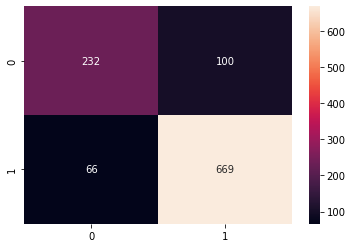

In [112]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [113]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [114]:
confusion_matrix(y_test, ytest_predict)

array([[ 87,  43],
       [ 39, 289]], dtype=int64)

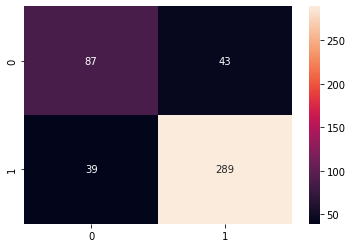

In [115]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [116]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       130
           1       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC 0.902


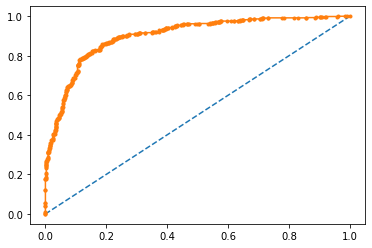

In [117]:
probs = lo_reg.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.882


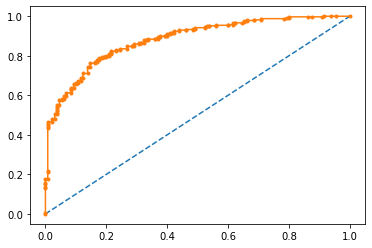

In [118]:
probs = lo_reg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [119]:
lo_reg.intercept_

array([1.4929121])

In [120]:
param_grid = {
    'penalty':['l2','none','l1'],
    'max_iter':[100,500,1000],
    'n_jobs':[-1,0,1],
    'solver':['lbfgs','newton-cg','sag']
    }

In [121]:
lr_model = LogisticRegression(random_state=1)

In [122]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3)

In [123]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'max_iter': [100, 500, 1000], 'n_jobs': [-1, 0, 1],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
grid_search.best_params_

{'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [125]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [126]:
best_grid = grid_search.best_estimator_

In [127]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [128]:
confusion_matrix(y_train, ytrain_predict1)

array([[232, 100],
       [ 66, 669]], dtype=int64)

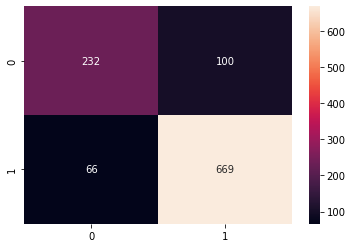

In [129]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [130]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [131]:
confusion_matrix(y_test, ytest_predict1)

array([[ 87,  43],
       [ 39, 289]], dtype=int64)

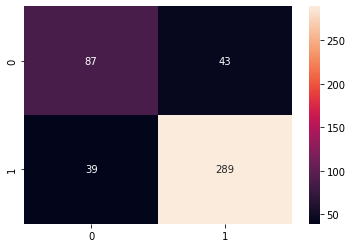

In [132]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [133]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       130
           1       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC 0.902


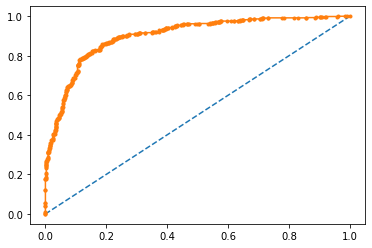

In [134]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.882


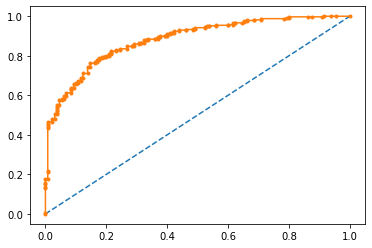

In [135]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [136]:
best_grid.intercept_

array([1.4929121])

In [137]:
lda_model = LinearDiscriminantAnalysis()
lda = lda_model.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [138]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

In [139]:
confusion_matrix(y_train, ytrain_predict)

array([[238,  94],
       [ 67, 668]], dtype=int64)

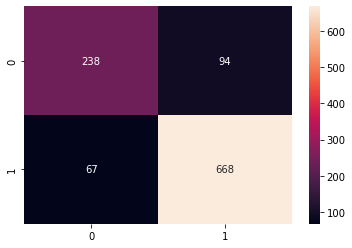

In [140]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [141]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [142]:
confusion_matrix(y_test, ytest_predict)

array([[ 88,  42],
       [ 44, 284]], dtype=int64)

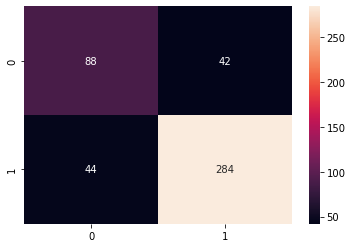

In [143]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [144]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC 0.897


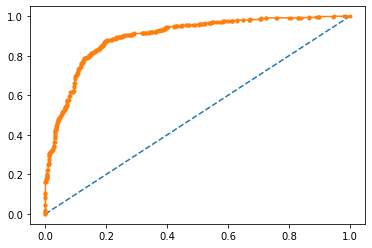

In [145]:
probs = lda.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.880


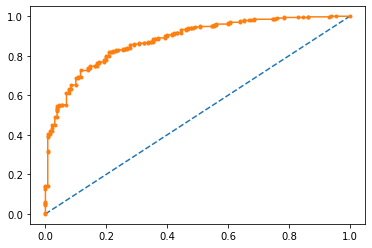

In [146]:
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [147]:
lda_model = LinearDiscriminantAnalysis()

In [148]:
param_grid = {'solver':['svd', 'lsqr', 'eigen']
             }

In [149]:
grid_search = GridSearchCV(estimator=lda_model, param_grid=param_grid, cv=3)

In [150]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearDiscriminantAnalysis(covariance_estimator=None,
                                                  n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             n_jobs=None, param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
grid_search.best_params_

{'solver': 'svd'}

In [152]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [153]:
best_grid = grid_search.best_estimator_

In [154]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [155]:
confusion_matrix(y_train, ytrain_predict1)

array([[238,  94],
       [ 67, 668]], dtype=int64)

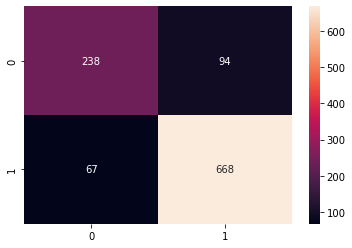

In [156]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [157]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [158]:
confusion_matrix(y_test, ytest_predict1)

array([[ 88,  42],
       [ 44, 284]], dtype=int64)

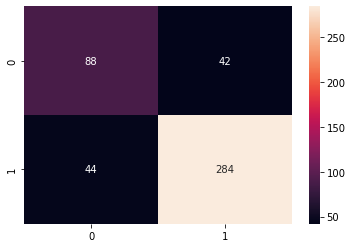

In [159]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [160]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC 0.897


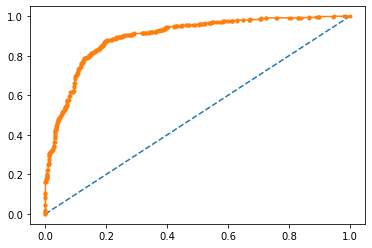

In [161]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.880


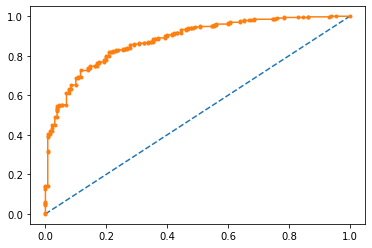

In [162]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [163]:
NNH = KNeighborsClassifier( n_neighbors = 5, weights = 'distance')

In [164]:
knn = NNH.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [165]:
ytrain_predict = knn.predict(X_train)
ytest_predict = knn.predict(X_test)

In [166]:
confusion_matrix(y_train, ytrain_predict)

array([[331,   1],
       [ 17, 718]], dtype=int64)

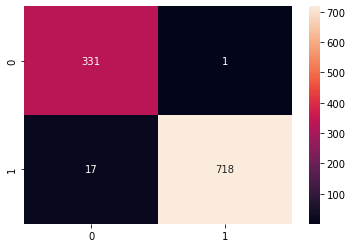

In [167]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [168]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       332
           1       1.00      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.97      0.99      0.98      1067
weighted avg       0.98      0.98      0.98      1067



In [169]:
confusion_matrix(y_test, ytest_predict)

array([[ 82,  48],
       [ 46, 282]], dtype=int64)

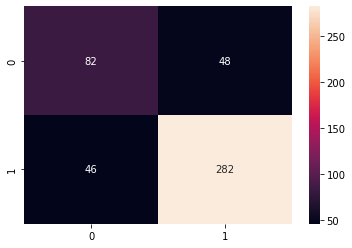

In [170]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [171]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       130
           1       0.85      0.86      0.86       328

    accuracy                           0.79       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.79      0.79      0.79       458



AUC 0.999


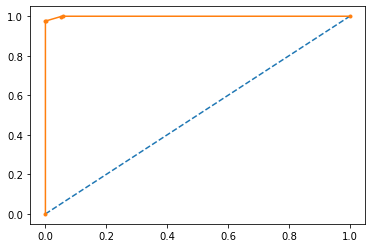

In [172]:
probs = knn.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.835


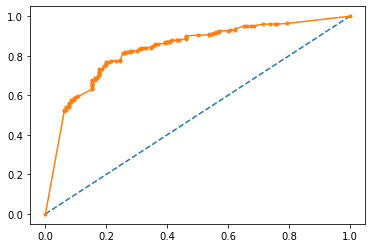

In [173]:
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [174]:
kncl = KNeighborsClassifier()

In [175]:
param_grid ={  'n_neighbors': range(5,20),
               'weights' : ['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }

In [176]:
grid_search = GridSearchCV(estimator=kncl, param_grid=param_grid, cv=3)

In [177]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [178]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [179]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [180]:
best_grid = grid_search.best_estimator_

In [181]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [182]:
confusion_matrix(y_train, ytrain_predict1)

array([[222, 110],
       [ 71, 664]], dtype=int64)

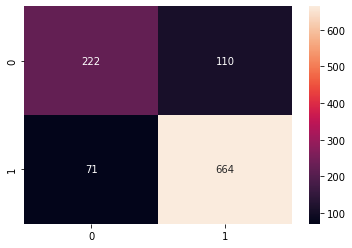

In [183]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [184]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.90      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [185]:
confusion_matrix(y_test, ytest_predict1)

array([[ 83,  47],
       [ 40, 288]], dtype=int64)

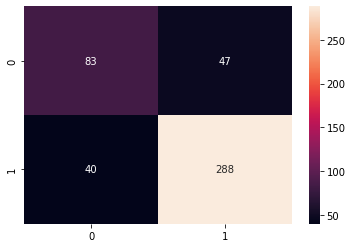

In [186]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [187]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



AUC 0.894


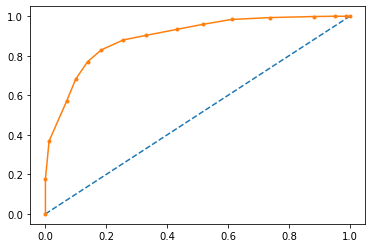

In [188]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.882


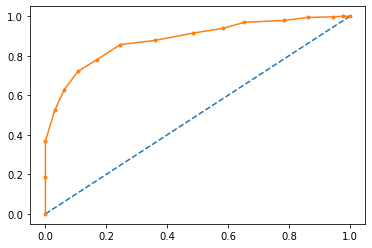

In [189]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [190]:
NB_model = GaussianNB()
nb = NB_model.fit(X_train, y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [191]:
ytrain_predict = nb.predict(X_train)
ytest_predict = nb.predict(X_test)

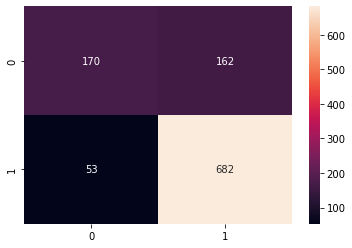

In [192]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [193]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61       332
           1       0.81      0.93      0.86       735

    accuracy                           0.80      1067
   macro avg       0.79      0.72      0.74      1067
weighted avg       0.79      0.80      0.79      1067



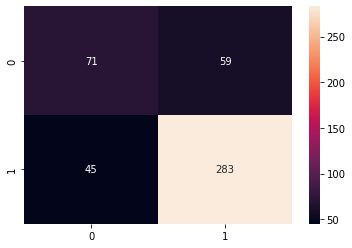

In [194]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [195]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       130
           1       0.83      0.86      0.84       328

    accuracy                           0.77       458
   macro avg       0.72      0.70      0.71       458
weighted avg       0.77      0.77      0.77       458



AUC 0.858


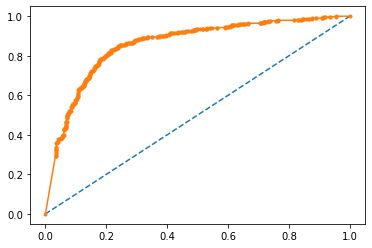

In [196]:
probs = nb.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.829


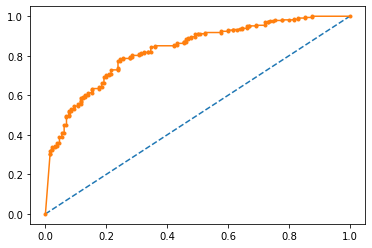

In [197]:
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [198]:
dt_model = DecisionTreeClassifier(criterion = 'gini')
dTree = dt_model.fit(X_train, y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [199]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9831302717900656
0.7729257641921398


In [201]:
train_char_labels = ['No', 'Yes']
Credit_Tree_File = open('D:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_labels))
Credit_Tree_File.close()

In [202]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [203]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.817244611059044
0.8013100436681223


In [204]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('D:\credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

In [205]:
dTreeR.feature_importances_

array([0.02161195, 0.        , 0.        , 0.3251553 , 0.2304347 ,
       0.        , 0.01909079, 0.        , 0.        , 0.02226013,
       0.06180333, 0.19480982, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00803838,
       0.0174139 , 0.        , 0.        , 0.        , 0.01252511,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05127501,
       0.        , 0.03558159, 0.        , 0.        , 0.        ,
       0.        ])

In [206]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                Imp
Hague_1                    0.021612
Hague_2                    0.000000
Hague_3                    0.000000
Hague_4                    0.325155
Hague_5                    0.230435
economic_cond_national_1   0.000000
economic_cond_national_2   0.019091
economic_cond_national_3   0.000000
economic_cond_national_4   0.000000
economic_cond_national_5   0.022260
Blair_1                    0.061803
Blair_2                    0.194810
Blair_3                    0.000000
Blair_4                    0.000000
Blair_5                    0.000000
Europe_1                   0.000000
Europe_2                   0.000000
Europe_3                   0.000000
Europe_4                   0.000000
Europe_5                   0.008038
Europe_6                   0.017414
Europe_7                   0.000000
Europe_8                   0.000000
Europe_9                   0.000000
Europe_10                  0.012525
Europe_11                  0.000000
economic_cond_household_1  0

In [207]:
ytrain_predict = dTreeR.predict(X_train)
ytest_predict = dTreeR.predict(X_test)

In [208]:
confusion_matrix(y_train, ytrain_predict)

array([[209, 123],
       [ 72, 663]], dtype=int64)

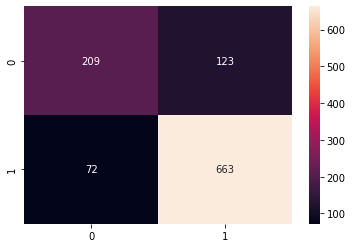

In [209]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [210]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       332
           1       0.84      0.90      0.87       735

    accuracy                           0.82      1067
   macro avg       0.79      0.77      0.78      1067
weighted avg       0.81      0.82      0.81      1067



In [211]:
confusion_matrix(y_test, ytest_predict)

array([[ 74,  56],
       [ 35, 293]], dtype=int64)

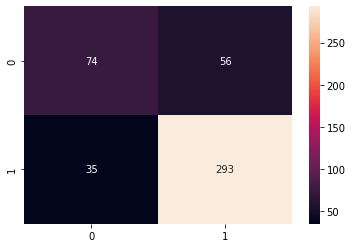

In [212]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [213]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       130
           1       0.84      0.89      0.87       328

    accuracy                           0.80       458
   macro avg       0.76      0.73      0.74       458
weighted avg       0.79      0.80      0.80       458



AUC 0.857


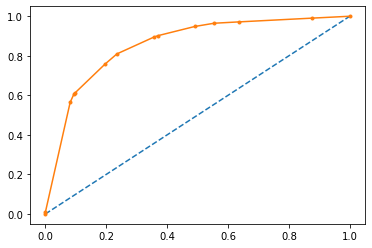

In [214]:
probs = dTreeR.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.836


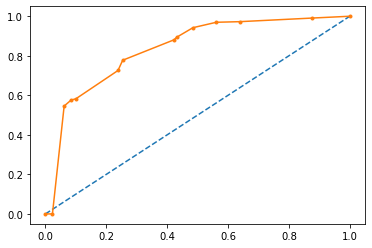

In [215]:
probs = dTreeR.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [216]:
param_grid = {
    'min_samples_split' : [10,20,30],
    'min_samples_leaf':[10,15,25],
    'max_depth':[5,10,15],
}

In [217]:
dtree = DecisionTreeClassifier()

In [218]:
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3)

In [219]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 15, 25],
                         'min_samples_split': [10, 20,

In [220]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 10}

In [221]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [222]:
best_grid = grid_search.best_estimator_

In [223]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [224]:
confusion_matrix(y_train, ytrain_predict1)

array([[208, 124],
       [ 74, 661]], dtype=int64)

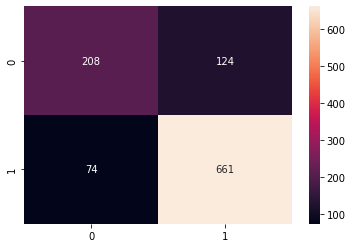

In [225]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [226]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       332
           1       0.84      0.90      0.87       735

    accuracy                           0.81      1067
   macro avg       0.79      0.76      0.77      1067
weighted avg       0.81      0.81      0.81      1067



In [227]:
confusion_matrix(y_test, ytest_predict1)

array([[ 77,  53],
       [ 34, 294]], dtype=int64)

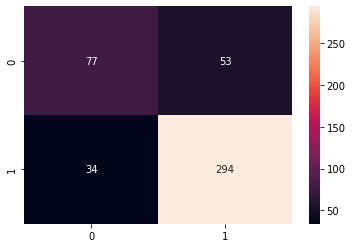

In [228]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [229]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       130
           1       0.85      0.90      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.74      0.76       458
weighted avg       0.80      0.81      0.81       458



AUC 0.867


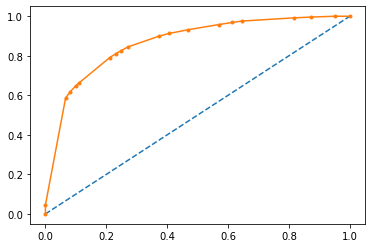

In [230]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.860


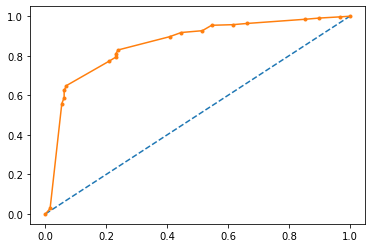

In [231]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [232]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [233]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [234]:
confusion_matrix(y_train, ytrain_predict)

array([[324,   8],
       [ 11, 724]], dtype=int64)

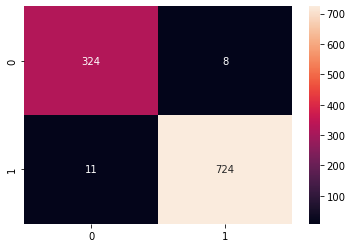

In [235]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [236]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       332
           1       0.99      0.99      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



In [237]:
confusion_matrix(y_test, ytest_predict)

array([[ 88,  42],
       [ 52, 276]], dtype=int64)

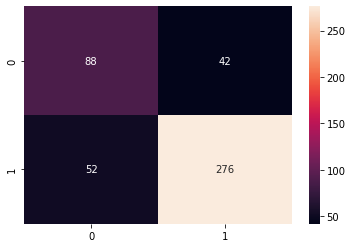

In [238]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [239]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       130
           1       0.87      0.84      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.76      0.75       458
weighted avg       0.80      0.79      0.80       458



AUC 0.999


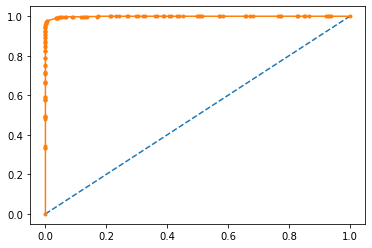

In [240]:
probs = rfcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.871


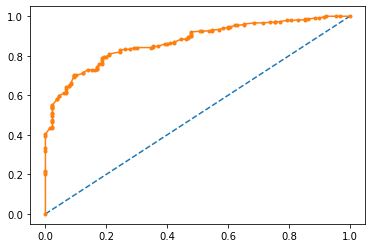

In [241]:
probs = rfcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [242]:
rfcl = RandomForestClassifier()

In [243]:
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [4, 6],
    'min_samples_leaf': [10, 25, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [101,301,501]    
}

In [244]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [245]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [246]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 501}

In [247]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [248]:
best_grid = grid_search.best_estimator_

In [249]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [250]:
confusion_matrix(y_train, ytrain_predict1)

array([[201, 131],
       [ 47, 688]], dtype=int64)

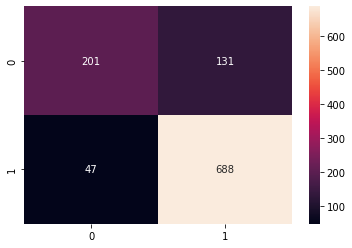

In [251]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [252]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69       332
           1       0.84      0.94      0.89       735

    accuracy                           0.83      1067
   macro avg       0.83      0.77      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [253]:
confusion_matrix(y_test, ytest_predict1)

array([[ 71,  59],
       [ 29, 299]], dtype=int64)

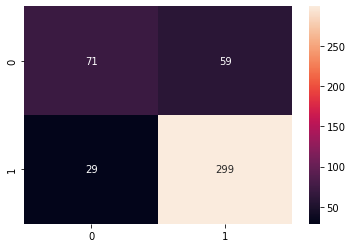

In [254]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [255]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       130
           1       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458



AUC 0.898


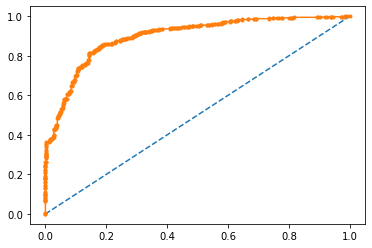

In [256]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.897


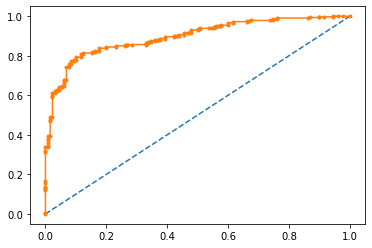

In [257]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [258]:
bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [259]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

In [260]:
confusion_matrix(y_train, ytrain_predict)

array([[298,  34],
       [ 10, 725]], dtype=int64)

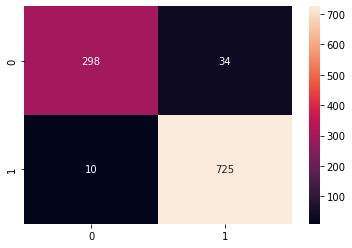

In [261]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [262]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       332
           1       0.96      0.99      0.97       735

    accuracy                           0.96      1067
   macro avg       0.96      0.94      0.95      1067
weighted avg       0.96      0.96      0.96      1067



In [263]:
confusion_matrix(y_test, ytest_predict)

array([[ 80,  50],
       [ 37, 291]], dtype=int64)

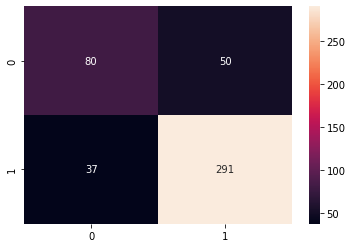

In [264]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [265]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458



AUC 0.995


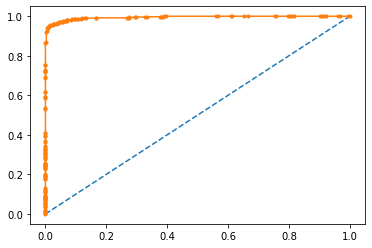

In [266]:
probs = bgcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.892


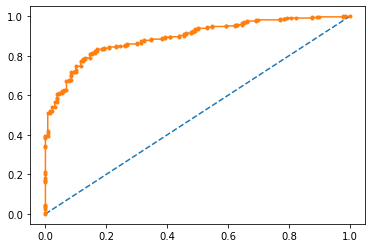

In [267]:
probs = bgcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [268]:
bgcl = BaggingClassifier(base_estimator=rfcl,random_state=1)

In [269]:
param_grid ={
             'n_estimators': [10, 20, 30],
             'max_samples' : [0.4, 0.6, 0.8],
             'base_estimator__n_estimators': [100, 300, 500],
             'base_estimator__max_features' : [5, 10, 15]
    }

In [270]:
grid_search = GridSearchCV(estimator=bgcl, param_grid=param_grid, cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_train, ytrain_predict1))

In [ ]:
confusion_matrix(y_test, ytest_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_test, ytest_predict1))

In [ ]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [ ]:
ytrain_predict = abcl.predict(X_train)
ytest_predict = abcl.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_train, ytrain_predict))

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_test, ytest_predict))

In [ ]:
probs = abcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = abcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)

In [ ]:
param_grid = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]
    }

In [ ]:
grid_search = GridSearchCV(estimator=abcl, param_grid=param_grid, cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_train, ytrain_predict1))

In [ ]:
confusion_matrix(y_test, ytest_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_test, ytest_predict1))

In [ ]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_train, ytrain_predict))

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_test, ytest_predict))

In [ ]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)

In [ ]:
param_grid = {
    "learning_rate": [0.1, 0.2, 0.3],
    "min_samples_split": np.linspace(0.1,1,10),
    "min_samples_leaf": np.linspace(0.1,1,10),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    }

In [ ]:
grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, cv=3)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [ ]:
confusion_matrix(y_train, ytrain_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_train, ytrain_predict1))

In [ ]:
confusion_matrix(y_test, ytest_predict1)

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [ ]:
print(classification_report(y_test, ytest_predict1))

In [ ]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

NLP

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
inaugural.raw('1941-Roosevelt.txt')

In [ ]:
inaugural.raw('1961-Kennedy.txt')

In [ ]:
inaugural.raw('1973-Nixon.txt')

In [ ]:
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

In [ ]:
print('number of characters in Roosevelt :',len(Roosevelt))

In [ ]:
print('number of characters in Kennedy :',len(Kennedy))

In [ ]:
print('number of characters in Nixon :',len(Nixon))

In [ ]:
print('number of words in Roosevelt :',len(Roosevelt.split()))

In [ ]:
print('number of words in Kennedy :',len(Kennedy.split()))

In [ ]:
print('number of words in Nixon :',len(Nixon.split()))

In [ ]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[Roosevelt,
                                       Kennedy,Nixon]},index=index)

In [ ]:
inaugural_speech

In [ ]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(data=inaugural_speech, x='president',y='char_count')
plt.title('Character count on inaugural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of characters')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 20)

In [ ]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(data=inaugural_speech, x='president',y='word_count')
plt.title('Word count on inaugural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of words')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 20)

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot( data=inaugural_speech, x='president',y='sents_count')
plt.title('Sentence count on inaugural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of sentences')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 20)


In [ ]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

In [ ]:
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

In [ ]:
inaugural_speech

In [ ]:
import string
from nltk.corpus import stopwords
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)
stopwords

In [ ]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
inaugural_speech

In [ ]:
print("Speech of Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

In [ ]:
print("Speech of Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

In [ ]:
print("Speech of Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inaygural speech of Roosevelt - 1941')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=20)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inaugural speech of Kennedy - 1961')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=20)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=20)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon after cleaning",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stopwords.extend(add_to_stop_words)
stopwords=set(stopwords)

In [ ]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
inaugural_speech

In [ ]:
print("Speech of Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

In [ ]:
print("Speech of Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

In [ ]:
print("Speech of Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inaygural speech of Roosevelt - 1941')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=20)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inaugural speech of Kennedy - 1961')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=20)

In [ ]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

In [ ]:
plt.figure(figsize=(10,7))
ax = freq.plot(kind='barh')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=20)

In [ ]:
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(figsize=(15, 10))
plt.title("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(figsize=(15, 10))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(figsize=(15, 10))
plt.title("Word Cloud for Nixon after cleaning",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()